In [41]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv("data/Res.tsv",sep="\t",names=["year","president","text"])

In [3]:
df.head()

,year,president,text
0,1790,George Washington,Fellow-Citizens of the Senate and House of R...
1,1790,George Washington,Fellow-Citizens of the Senate and House of R...
2,1791,George Washington,Fellow-Citizens of the Senate and House of R...
3,1792,George Washington,Fellow-Citizens of the Senate and House of R...
4,1793,George Washington,Fellow-Citizens of the Senate and House of R...


# POS Tagging

a function to extract the pos from a text and the actual extraction of pos from all the texts

1)

In [4]:
def pos(text):
    return nltk.pos_tag(nltk.word_tokenize(text.lower()))
poses = df["text"].apply(pos)

take a look at the pos structure

In [5]:
poses[0]

[('fellow-citizens', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('senate', 'NN'),
 ('and', 'CC'),
 ('house', 'NN'),
 ('of', 'IN'),
 ('representatives', 'NNS'),
 (':', ':'),
 ('i', 'JJ'),
 ('embrace', 'VBP'),
 ('with', 'IN'),
 ('great', 'JJ'),
 ('satisfaction', 'NN'),
 ('the', 'DT'),
 ('opportunity', 'NN'),
 ('which', 'WDT'),
 ('now', 'RB'),
 ('presents', 'VBZ'),
 ('itself', 'PRP'),
 ('of', 'IN'),
 ('congratulating', 'VBG'),
 ('you', 'PRP'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('present', 'JJ'),
 ('favorable', 'JJ'),
 ('prospects', 'NNS'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('public', 'JJ'),
 ('affairs', 'NNS'),
 ('.', '.'),
 ('the', 'DT'),
 ('recent', 'JJ'),
 ('accession', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('important', 'JJ'),
 ('state', 'NN'),
 ('of', 'IN'),
 ('north', 'JJ'),
 ('carolina', 'NNS'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('constitution', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('united', 'JJ'),
 ('states', 'NNS'),
 ('(', '('),
 ('of', 'IN'),
 ('which', 'WDT'),
 ('official', 'JJ'),

a function that create a function to extract a specific pos tagging from the pos list of a text

In [6]:
def extract_pos_type(name):
    def extract_pos(text_pos):
        counter = 0
        for word,pos in text_pos:
            if name==pos:
                counter += 1
        return counter
    return extract_pos

a function to extract the poses of a specific type and normalize it 

In [7]:
def extract_normalized_pos(poses,pos_name,df):
    df[pos_name] = poses.map(extract_pos_type(pos_name),list(poses))
    df[pos_name] = df[pos_name].apply(lambda x: float(x)/df[pos_name].sum())

extraction of the normalized count

In [8]:
extract_normalized_pos(poses,"NNP",df)
extract_normalized_pos(poses,"PRP",df)
extract_normalized_pos(poses,"DT",df)

plotting the graphs

2)

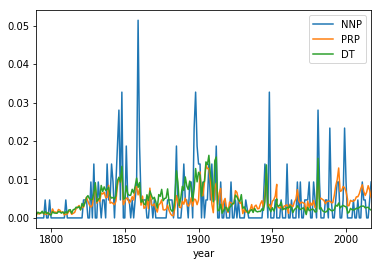

In [10]:
ax = df.plot(x='year',y=["NNP","PRP","DT"])
plt.show()

extract pos tags as text for n-gram calculation

In [32]:
df["pos_text"] = poses.apply(lambda pos_list: [x[1] for x in pos_list])

In [83]:
def get_ngram_top(data,ngram):
    ngrams = [list(nltk.ngrams(pos_text,ngram)) for pos_text in data]
    return reduce(lambda a,b: Counter(a)+Counter(b),ngrams,Counter())

In [84]:
bigrams = get_ngram_top(df["pos_text"],2)
trigrams = get_ngram_top(df["pos_text"],3)

3)

In [85]:
bigrams.most_common(5)

[(('IN', 'DT'), 118368),
 (('DT', 'NN'), 113976),
 (('NN', 'IN'), 108712),
 (('JJ', 'NN'), 74781),
 (('DT', 'JJ'), 62398)]

In [86]:
trigrams.most_common(5)

[(('IN', 'DT', 'NN'), 59411),
 (('DT', 'NN', 'IN'), 52939),
 (('NN', 'IN', 'DT'), 47051),
 (('DT', 'JJ', 'NN'), 38477),
 (('IN', 'DT', 'JJ'), 34132)]

In [87]:
def get_top_pos_grams_for_president(df,president,k_top):
    pos_text = df[df["president"]==president]["pos_text"]
    unigram = get_ngram_top(pos_text,1)
    bigram = get_ngram_top(pos_text,2)
    trigram = get_ngram_top(pos_text,3)
    print unigram
    return unigram.most_common(k_top),bigram.most_common(k_top),trigram.most_common(k_top)

In [88]:
df["president"].unique()

array(['George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'John Quincy Adams',
       'Andrew Jackson', 'John Tyler', 'James Polk', 'Zachary Taylor',
       'Millard Fillmore', 'Franklin Pierce', 'James Buchanan',
       'Abraham Lincoln', 'Andrew Johnson', 'Ulysses S. Gran',
       'Rutherford B. Haye', 'Chester A. Arthu', 'Grover Cleveland',
       'Benjamin Harrison', 'William McKinley', 'Theodore Roosevelt',
       'William H. Taf', 'Woodrow Wilson', 'Warren Harding',
       'Calvin Coolidge', 'Herbert Hoover', 'Franklin D. Roosevel',
       'Harry S. Truma', 'Dwight D. Eisenhowe', 'John F. Kenned',
       'Lyndon B. Johnso', 'Richard Nixon', 'Gerald R. For',
       'Jimmy Carter', 'Ronald Reagan', 'William J. Clinto',
       ') George W. B', 'George W. Bus', 'Barack Obama', 'Donald J. Trum'], dtype=object)

4)

In [90]:
for president in ["George Washington","Abraham Lincoln", "Richard Nixon", "Ronald Reagan", "Barack Obama","Donald J. Trum"]:
    print("pos ngrams for president %s"%president)
    print("%s\n%s\n%s\n"%get_top_pos_grams_for_president(df,president,5))

pos ngrams for president George Washington
Counter({('NN',): 2758, ('IN',): 2710, ('DT',): 2248, ('JJ',): 1420, ('NNS',): 1251, ('VB',): 831, (',',): 800, ('VBN',): 775, ('TO',): 669, ('CC',): 615, ('RB',): 592, ('.',): 444, ('PRP',): 419, ('MD',): 403, ('PRP$',): 387, ('VBP',): 288, ('VBZ',): 272, ('VBG',): 265, ('WDT',): 233, ('VBD',): 201, (':',): 89, ('CD',): 49, ('WP',): 46, ('RBR',): 34, ('JJS',): 33, ('JJR',): 32, ('WRB',): 29, ('RBS',): 21, ('EX',): 20, ('PDT',): 19, ('(',): 9, (')',): 9, ('RP',): 8, ("''",): 5, ('WP$',): 5, ('``',): 5, ('POS',): 2, ('NNPS',): 1, ('NNP',): 1, ('$',): 1})
[(('NN',), 2758), (('IN',), 2710), (('DT',), 2248), (('JJ',), 1420), (('NNS',), 1251)]
[(('IN', 'DT'), 1270), (('NN', 'IN'), 1108), (('DT', 'NN'), 1099), (('DT', 'JJ'), 612), (('JJ', 'NN'), 591)]
[(('DT', 'NN', 'IN'), 608), (('IN', 'DT', 'NN'), 608), (('NN', 'IN', 'DT'), 527), (('IN', 'DT', 'JJ'), 390), (('DT', 'JJ', 'NN'), 363)]

pos ngrams for president Abraham Lincoln
Counter({('NN',): 4651,

5) Are there significant changes in the most frequent tags through the years? Between presidents?

# Named Entity Recognition